# Librairies initiales

In [1]:
import os
import spacy
nlp = spacy.load('fr_core_news_lg')
from spacy.matcher import Matcher
import pandas as pd
from collections import Counter

2022-05-31 19:45:21.433666: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-31 19:45:21.433695: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## I. Importe corpus

In [2]:
def import_file(dir_corpus):
    
    nlp.max_length = 1500000
    
    if os.path.isdir(dir_corpus):

        files_list = sorted(os.listdir(dir_corpus))
        files = list()
        files_names = list()

        for file_ext in files_list:
            
            file_name = file_ext.rsplit(".", 1)[0]
            file_path = os.path.join(dir_corpus,file_ext)
            
            if file_name in files_names:
                print(file_name)
                continue
            
            files_names.append(file_name)

            with open(file_path, 'r') as f:

                file = f.readlines()
                str_file = ''.join(file)

                spacy_file = nlp(str_file)
                files.append(spacy_file)
                
                print(files_list.index(file_ext)+1,'/',len(files_list),' | ',file_name,'\n',len(str_file),'caractères | ', len(spacy_file), 'tokens')
        return files, files_names

In [3]:
dir_cwd = os.getcwd()
print(dir_cwd)
dir_corpus = '/home/lf/Bureau/Memoire/Corpus_complet'
files, files_names = import_file(dir_corpus)

/home/lf/Bureau/Memoire/2_Exploitation
1 / 27  |  EZ_La_Bete_humaine 
 764102 caractères |  166372 tokens
2 / 27  |  EZ_LŒuvre 
 796583 caractères |  172648 tokens
3 / 27  |  EZ_Therese_Raquin 
 416333 caractères |  85516 tokens
4 / 27  |  GB_la_france_contre_les_robots 
 192290 caractères |  43593 tokens
5 / 27  |  GB_le_chemin_de_la_croix_des_ames 
 1067376 caractères |  232492 tokens
6 / 27  |  GB_scandale_de_la_verite 
 79646 caractères |  18026 tokens
7 / 27  |  HS_La_Chartreuse_de_Parme 
 1066228 caractères |  223024 tokens
8 / 27  |  HS_Le_Rouge_et_le_Noir 
 1013391 caractères |  215877 tokens
9 / 27  |  JBdA_Les_Quarante_Médaillons_de_l’Académie 
 92194 caractères |  19781 tokens
10 / 27  |  JKH_En_rade 
 302877 caractères |  64096 tokens
11 / 27  |  JKH_Là-bas 
 541454 caractères |  116130 tokens
12 / 27  |  JKH_À_rebours 
 439799 caractères |  87665 tokens
13 / 27  |  LB_Belluaires_et_porchers 
 948530 caractères |  190631 tokens
14 / 27  |  LB_Christophe_Colomb_devant_les_ta

# I. Occurence et fréquence de termes (tokens par catégories grammaticales)

In [4]:
matcher = Matcher(nlp.vocab)

matchers = {'Adjectifs':[{'POS': 'ADJ'}],'Adjectifs_Apose':[{'POS': 'NOUN', 'OP':'!'}, {'POS': 'ADJ'}, {'POS': 'NOUN', 'OP':'!'}],\
            'Adjectifs_Antepose':[{'POS': 'ADJ'}, {'POS': 'NOUN'}], 'Adjectifs_Postpose':[{'POS': 'NOUN'}, {'POS': 'ADJ'}],\
            'Verbes':[{'POS': 'VERB'}],'Noms_communs':[{'POS': 'NOUN'}],\
            'Déterminants':[{'POS': 'DET'}],'Prépositions':[{'POS': 'ADP'}],'Pronoms':[{'POS': 'PRON'}],\
            'Noms_propres':[{'POS': 'PROPN'}],'Auxiliaires':[{'POS': 'AUX'}],\
            'Conjonctions_coordinations':[{'POS': 'CCONJ'}],'Conjonctions_subordinations':[{'POS': 'SCONJ'}],\
            'Interjections':[{'POS': 'INTJ'}],'Ponctuations':[{'POS': 'PUNCT'}]}

matchers_ = {'Adjectifs':[{'POS': 'ADJ'}],\
            'Verbes':[{'POS': 'VERB'}],'Noms_communs':[{'POS': 'NOUN'}],\
            'Déterminants':[{'POS': 'DET'}],'Prépositions':[{'POS': 'ADP'}],'Pronoms':[{'POS': 'PRON'}],\
            'Noms_propres':[{'POS': 'PROPN'}],'Auxiliaires':[{'POS': 'AUX'}],\
            'Conjonctions_coordinations':[{'POS': 'CCONJ'}],'Conjonctions_subordinations':[{'POS': 'SCONJ'}],\
            'Interjections':[{'POS': 'INTJ'}],'Ponctuations':[{'POS': 'PUNCT'}]}
matchers_collocate = dict()
for k, v in matchers_.items():
    for n, p in matchers_.items():
        key_collocate = k+'_'+n
        pattern_collocate = v+p
        if key_collocate not in matchers_collocate.keys():
            matchers_collocate[key_collocate]=pattern_collocate
matchers_collocate

{'Adjectifs_Adjectifs': [{'POS': 'ADJ'}, {'POS': 'ADJ'}],
 'Adjectifs_Verbes': [{'POS': 'ADJ'}, {'POS': 'VERB'}],
 'Adjectifs_Noms_communs': [{'POS': 'ADJ'}, {'POS': 'NOUN'}],
 'Adjectifs_Déterminants': [{'POS': 'ADJ'}, {'POS': 'DET'}],
 'Adjectifs_Prépositions': [{'POS': 'ADJ'}, {'POS': 'ADP'}],
 'Adjectifs_Pronoms': [{'POS': 'ADJ'}, {'POS': 'PRON'}],
 'Adjectifs_Noms_propres': [{'POS': 'ADJ'}, {'POS': 'PROPN'}],
 'Adjectifs_Auxiliaires': [{'POS': 'ADJ'}, {'POS': 'AUX'}],
 'Adjectifs_Conjonctions_coordinations': [{'POS': 'ADJ'}, {'POS': 'CCONJ'}],
 'Adjectifs_Conjonctions_subordinations': [{'POS': 'ADJ'}, {'POS': 'SCONJ'}],
 'Adjectifs_Interjections': [{'POS': 'ADJ'}, {'POS': 'INTJ'}],
 'Adjectifs_Ponctuations': [{'POS': 'ADJ'}, {'POS': 'PUNCT'}],
 'Verbes_Adjectifs': [{'POS': 'VERB'}, {'POS': 'ADJ'}],
 'Verbes_Verbes': [{'POS': 'VERB'}, {'POS': 'VERB'}],
 'Verbes_Noms_communs': [{'POS': 'VERB'}, {'POS': 'NOUN'}],
 'Verbes_Déterminants': [{'POS': 'VERB'}, {'POS': 'DET'}],
 'Verbes_Pré

In [5]:
def match_token(pattern, doc):
    """ liste les tokens d'un document d'après un pattern"""
    
    matcher.add('rule', [pattern])
    matches = matcher(doc)
    
    tokens = []
    tottoken = len(matches)
    
    for match_id, start, end in matches:
        
        string_id = nlp.vocab.strings[match_id]  # Get string representation
        span = doc[start:end]  # The matched span
        
        tokens.append(span.text)
    matcher.remove('rule')

    return(tokens)

In [6]:
def df_maker(list_tokens):    
    """ retourne un dataframe de l'occurence et frequence de tokens"""

    df = pd.DataFrame(columns=['token','occurence','frequence'])
    
    nb_all = len(list_tokens)
    dic_tokens = dict(Counter(list_tokens).most_common())

    for k, v in dic_tokens.items():
        
        row = [k, v, v/nb_all]
        
        a_series = pd.Series(row, index = df.columns)
        df = df.append(a_series, ignore_index=True)
        
    return df

In [7]:
df1 = pd.DataFrame(index=files_names, columns=matchers.keys())

for name, pattern in matchers.items():
    
    occ =list()
    i=0  
    
    for file in files:
        
        list_tokens = match_token(pattern, file)
        df = df_maker(list_tokens)
        occ.append(df)
        i+=1
        
    df1[name]=occ

df1

,Adjectifs,Adjectifs_Apose,Adjectifs_Antepose,Adjectifs_Postpose,Verbes,Noms_communs,Déterminants,Prépositions,Pronoms,Noms_propres,Auxiliaires,Conjonctions_coordinations,Conjonctions_subordinations,Interjections,Ponctuations
EZ_La_Bete_humaine,token occurence frequence 0 ...,token occurence frequence...,token occurence frequen...,token occurence frequen...,token occurence frequence 0 ...,token occurence frequence 0 f...,token occurence frequence 0 ...,token occurence frequence 0 de...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 que ...,token occurence frequence 0 ...,"token occurence frequence 0 , ..."
EZ_LŒuvre,token occurence frequence 0 ...,token occurence frequence ...,token occurence frequence ...,token occurence frequence 0...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 de...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 et...,token occurence frequence 0 que ...,token occurence frequence 0 Eh...,token occurence frequence 0 ...
EZ_Therese_Raquin,token occurence frequence 0 ...,token occurence frequence ...,token occurence frequence ...,token occurence frequence 0...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 la ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 Thé...,token occurence frequence 0 éta...,token occurence frequence 0 et ...,token occurence frequence 0 que...,token occurence frequence 0 Eh 13...,"token occurence frequence 0 , 63..."
GB_la_france_contre_les_robots,token occurence frequence 0 ...,token occurence freque...,token occurence frequence...,token occurence frequence...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 la ...,token occurence frequence 0 ...,token occurence frequence 0 qui ...,token occurence frequence 0 ...,token occurence frequence 0 est ...,token occurence frequence 0 ...,token occurence frequence 0 que ...,token occurence frequence 0 Hélas ...,token occurence frequence 0 ...
GB_le_chemin_de_la_croix_des_ames,token occurence frequence 0 ...,token occurence frequen...,token occurence frequence ...,token occurence frequ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 la...,token occurence frequence 0 ...,token occurence frequence 0 qui ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 que...,token occurence frequence 0 hélas ...,token occurence frequence 0 ...
GB_scandale_de_la_verite,token occurence frequence 0 ...,token occurence freque...,token occurence frequence ...,token occurence frequ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 la ...,token occurence frequence 0 de ...,token occurence frequence 0 ...,token occurence frequence 0 Fran...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 que ...,token occurence frequence 0 Eh ...,"token occurence frequence 0 , ..."
HS_La_Chartreuse_de_Parme,token occurence frequence 0 ...,token occurence frequen...,token occurence frequence 0...,token occurence frequence ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 ...,token occurence frequence 0 Fabrice...,token occurence frequence 0 ...,token occurence frequence 0 et ...,token occurence frequence 0 ...,token occurence frequence 0 Eh ...,token occurence frequence 0 ...
HS_Le_Rouge_et_le_Noir,token occurence frequence 0 ...,token occurence frequence 0...,token occurence frequence 0...,token occurence frequence 0...,token occurence frequence 0 ...,token occurence frequence 

# collocation des patterns

In [33]:
df2 = pd.DataFrame(index=files_names, columns=matchers.keys())

for name, pattern in matchers_collocate.items():
    
    occ =list()
    i=0  
    
    for file in files:
        
        list_tokens = match_token(pattern, file)
        df = df_maker(list_tokens)
        occ.append(df)
        i+=1
        
    df2[name]=occ

df2.Verbes

KeyboardInterrupt: 

In [44]:
for elem in df1.Verbes:
    for e in elem.token[0:100]:
        print(e)
    print('--------------------------------------')

avait
venait
faire
eut
voir
dit
allait
dire
pouvait
semblait
devait
fait
faisait
eu
a
prendre
savait
avoir
regardait
est
vu
pris
disait
voulait
aller
tuer
sais
fit
reprit
pu
sentait
trouvait
restait
voyait
voulu
ai
passer
donner
va
veux
savoir
aimait
attendait
mettre
passait
dû
continuait
trouver
répondit
faut
croyait
arrivait
tenait
fini
parler
tué
ayant
entendait
regarda
attendre
monter
demanda
venir
mit
manger
rester
chercher
montre
vit
arrêta
continua
prenait
leva
sortait
coupé
devenait
senti
passa
peut
montait
finit
étais
entrait
causer
sortir
fallait
donnait
vais
murmura
put
trouvé
faite
parlait
venu
morte
coucher
revint
répondre
pouvoir
voilà
--------------------------------------
avait
dit
faire
eut
a
voir
fait
venait
semblait
eu
faisait
allait
est
devait
pouvait
voyait
avoir
sais
dire
prendre
trouvait
pris
disait
répondit
sentait
mettre
restait
reprit
voulait
fit
vivre
aller
faut
ai
regardait
demanda
voilà
veux
va
fallait
manger
parlait
vu
mit
vais
fini
murmura
peindre
finit
c

# II. Réduction de dimension, ACP et sortie d'une matrice documents-termes (tokens) par classes gramaticales

In [8]:
def reduc_dim(df_corpus, occurence, n = 100):
    
    col = ['texte']
    col = col+list(df_corpus['token'][0:n])

    df = pd.DataFrame(columns=col)

    for texte, dic in occurence.items():
        row = [texte]

        for col_val in col[1:]:
            frequence = 0
            if col_val in occurence[texte].values:
                frequence = occurence[texte].loc[occurence[texte]['token'] == col_val, 'frequence'].values[0]

            if col_val not in occurence[texte].values:
                frequence = 0

            row.append(frequence)

        a_series = pd.Series(row, index = df.columns)
        df = df.append(a_series, ignore_index=True)
    return df

In [9]:
dir_out_data = '/home/lf/Bureau/Memoire/2_Exploitation/out_spacy'
for col in df1.columns:
    i = 0
    all_tokens = list()
    occurence = dict()
    
    for df in df1[col]:
        
        all_tokens+=list(df.token).copy()
        occurence[files_names[i]] = df
        i+=1
        
    df_corpus = df_maker(all_tokens)
    
    composant = 100
    df_reduc = reduc_dim(df_corpus, occurence, composant)

    # exporter les dataframes
    out_file = os.path.join(dir_out_data, col+'.xlsx')
    if not os.path.isdir(dir_out_data):
        os.mkdir(dir_out_data)
    df_reduc.to_excel(out_file)
    print(out_file)

/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Adjectifs.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Adjectifs_Apose.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Adjectifs_Antepose.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Adjectifs_Postpose.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Verbes.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Noms_communs.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Déterminants.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Prépositions.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Pronoms.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Noms_propres.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Auxiliaires.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Conjonctions_coordinations.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Conjonctions_subordinations.xlsx
/home/lf/Bureau/Memoire/2_Exploitation/out_spacy/Interjections.xlsx
/home/lf/Bureau/Memoire/2_Exploi

# III. Diversité des termes par classes grammaticales : Type-token Ratio (TTR)
## nombre total de tokens par ouvrage

In [10]:
all_tokens_list = []
for file in files:
    all_tokens_list.append(len(file))
    
print(all_tokens_list)

[166372, 172648, 85516, 43593, 232492, 18026, 223024, 215877, 19781, 64096, 116130, 87665, 190631, 48424, 65110, 75128, 36659, 34826, 23818, 5706, 19834, 138828, 110358, 137529, 47393, 93620, 77701]


# diversité et occurences des natures de mots

In [11]:
diversity = {}

for pattern in df1.columns:
    
    x = list()
    y = list()
    color, color_1 = list(), list()
    
    for title in df1.index:
        
        # si auteurs pamphlétaires couleurs rouge et orange sinon bleu et violet
        if title[0:2] in ['GB','LB', 'JB', 'VH']:
            color.append('red')
            color_1.append('orange')
        else:
            color.append('blue')
            color_1.append('violet')
        
        # nombre de tokens matchés uniques et nombre total de tokens matchés
        unique_tokens = df1.at[title, pattern].occurence.size
        numbers_tokens = df1.at[title, pattern].occurence.sum()
        
        x.append(unique_tokens)
        y.append(numbers_tokens)
        
    # pondère au nombre total de token de l'ouvrage 
    uni_tok = [(int(d) / int(e)) for d,e in zip(x, all_tokens_list)]
    all_tok = [(int(d) / int(e)) for d,e in zip(y, all_tokens_list)]
    
    df3 = pd.DataFrame(index=['all_tokens','unique_tokens','color','color_1'], columns=df1.index, data=[all_tok,uni_tok,color,color_1])
    diversity[pattern]=df3.T
    
#diversity

In [20]:
diversity

{'Adjectifs':                                            all_tokens unique_tokens color  \
 EZ_La_Bete_humaine                            0.04618      0.010747  blue   
 EZ_LŒuvre                                    0.052569      0.012777  blue   
 EZ_Therese_Raquin                            0.053394      0.015611  blue   
 GB_la_france_contre_les_robots               0.059023      0.030739   red   
 GB_le_chemin_de_la_croix_des_ames             0.06223      0.017115   red   
 GB_scandale_de_la_verite                     0.067347      0.040331   red   
 HS_La_Chartreuse_de_Parme                    0.050196      0.009205  blue   
 HS_Le_Rouge_et_le_Noir                       0.052182      0.009737  blue   
 JBdA_Les_Quarante_Médaillons_de_l’Académie   0.056468      0.031394   red   
 JKH_En_rade                                  0.050284      0.024026  blue   
 JKH_Là-bas                                   0.050254      0.020046  blue   
 JKH_À_rebours                                0.066

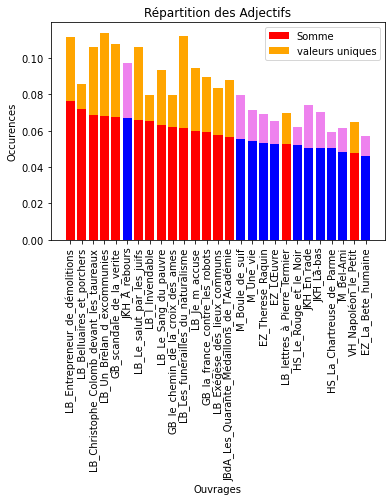

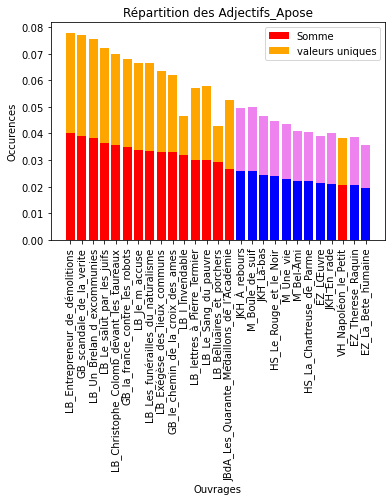

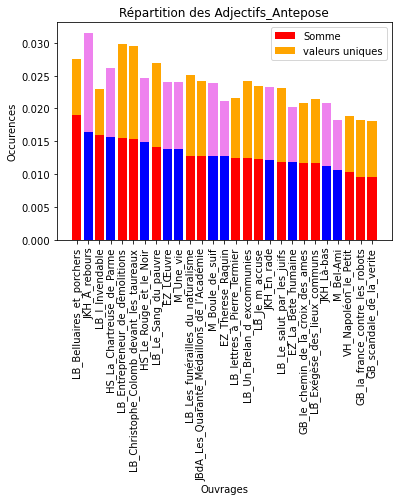

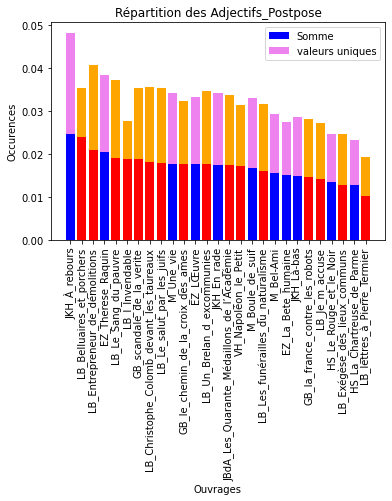

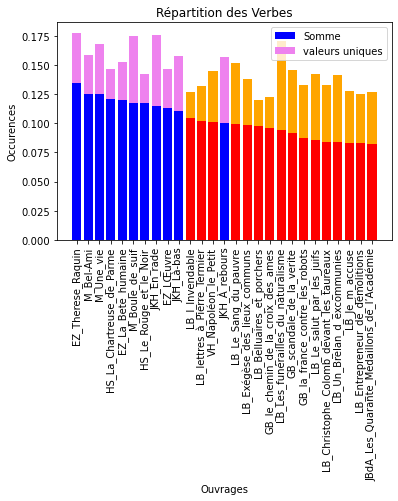

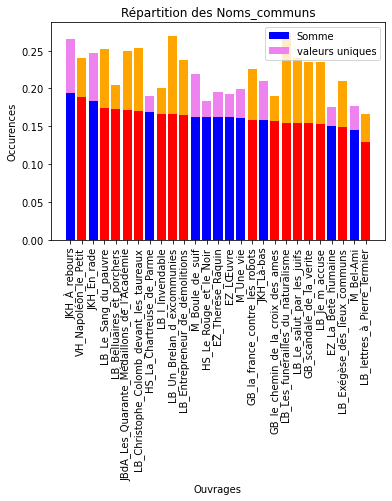

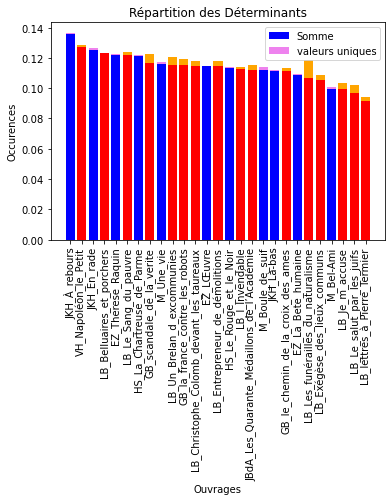

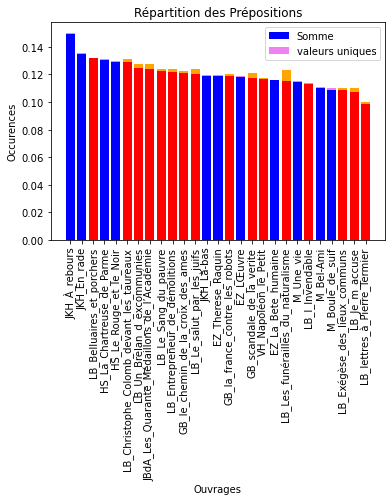

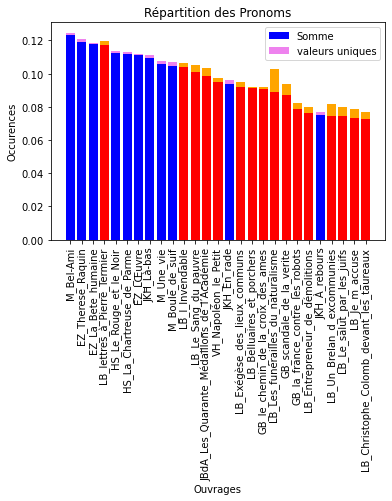

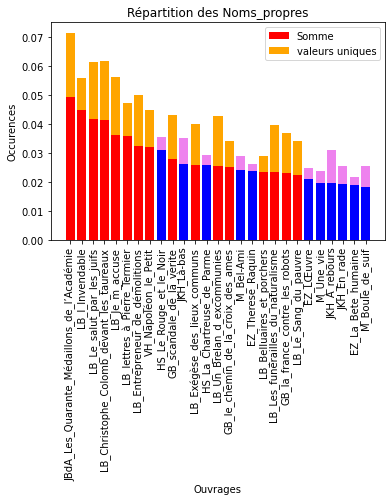

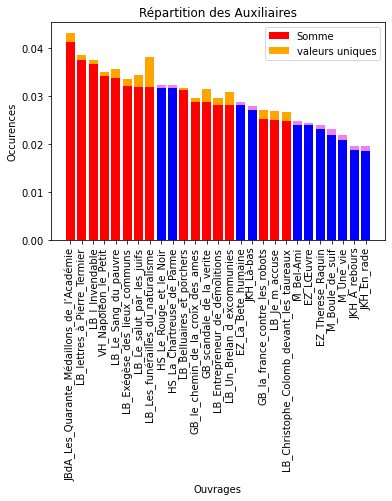

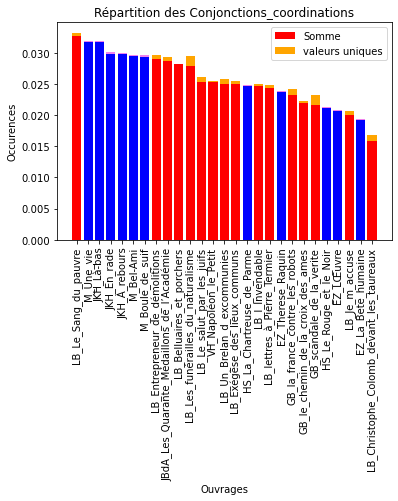

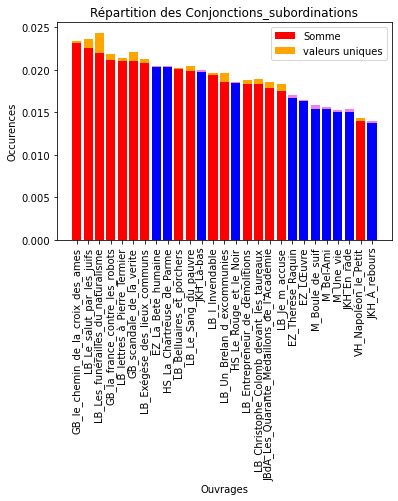

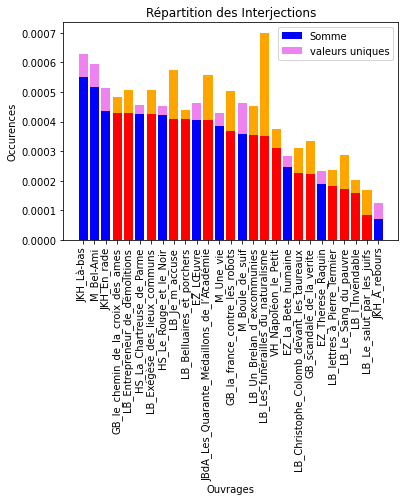

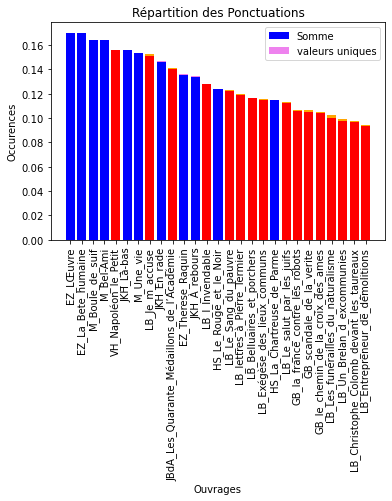

In [12]:
import matplotlib.pyplot as plt
dir_out = '/home/lf/Bureau/Memoire/2_Exploitation/Visualisation'
fig, ax = plt.subplots()

for pattern, dfval in diversity.items():
    
    # sort value ordre décroissant pour les uniques_tokens
    #dfval = dfval.sort_values(by=['unique_tokens'], ascending=False)
    
    # sort value ordre croissant pour les all_tokens
    dfval = dfval.sort_values(by=['all_tokens'], ascending=False)
    
    plt.bar(dfval.index ,dfval.all_tokens , color=dfval.color)
    plt.bar(dfval.index , dfval.unique_tokens, bottom=dfval.all_tokens, color=dfval.color_1)
    plt.xlabel("Ouvrages")
    plt.ylabel("Occurences")
    plt.xticks(rotation=90)
    plt.legend(["Somme", "valeurs uniques"], loc ="upper right")
    titre_plt = 'Repartition_des_'+pattern
    plt.title('Répartition des '+pattern)
    plt.savefig(os.path.join(dir_out,titre_plt+'.png'),facecolor='white', bbox_inches='tight')
    plt.show()
    